# CIFAR-10 Dataset Exploration

The goal of this notebook is to explore and understand the CIFAR-10 dataset
before designing and training any deep learning model.

Understanding the data is a critical step in any machine learning pipeline,
as it directly influences architectural choices, training strategies, and
performance expectations.


In [21]:
# Core PyTorch library for tensor operations and deep learning
import torch

# Torchvision provides datasets and image transformations
import torchvision
import torchvision.transforms as transforms

# Standard libraries for numerical operations and visualization
import numpy as np
import matplotlib.pyplot as plt


In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [23]:
# Convert PIL images to PyTorch tensors and normalize pixel values to [0, 1]
transform = transforms.ToTensor()

# Load the CIFAR-10 training dataset
# - train=True selects the training split
# - download=True automatically downloads the dataset if not already available
train_dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

# Load the CIFAR-10 test dataset
test_dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform
)


In [24]:
len(train_dataset), len(test_dataset)


(50000, 10000)

In [25]:
# Retrieve the human-readable class names
class_names = train_dataset.classes
class_names


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [26]:
img, label = train_dataset[0]
img.shape, label


(torch.Size([3, 32, 32]), 6)

## Image Structure

Each image is represented as a tensor of shape:
- (3, 32, 32)

This corresponds to:
- 3 color channels (RGB)
- Spatial resolution of 32x32 pixels

The low resolution suggests that fine-grained details may be difficult to capture.


In [27]:
def show_image(img, label):
    """
    Visualize a CIFAR-10 image tensor.

    Args:
        img (Tensor): Image tensor with shape (C, H, W)
        label (int): Class index
    """
    # Convert from (C, H, W) to (H, W, C) for visualization
    img = img.permute(1, 2, 0)

    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis("off")



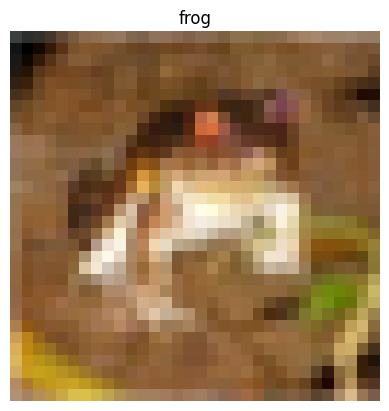

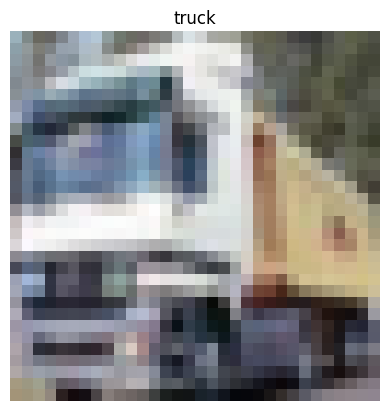

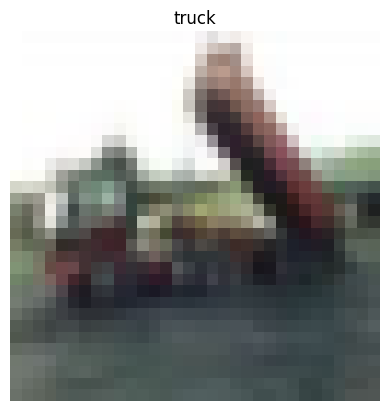

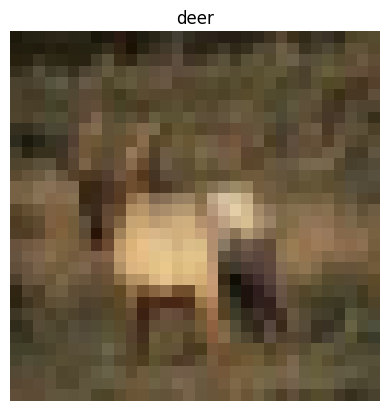

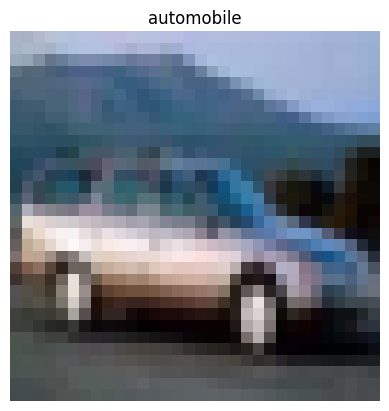

In [28]:
# Visualize multiple samples to assess variability and noise
for i in range(5):
    img, label = train_dataset[i]
    show_image(img, label)
    plt.show()


In [29]:
from collections import Counter

# Count occurrences of each class label in the training dataset
labels = [label for _, label in train_dataset]
class_distribution = Counter(labels)

# Print the number of samples per class
for class_idx, count in class_distribution.items():
    print(f"{class_names[class_idx]}: {count}")


frog: 5000
truck: 5000
deer: 5000
automobile: 5000
bird: 5000
horse: 5000
ship: 5000
cat: 5000
dog: 5000
airplane: 5000


## Conclusions

The CIFAR-10 dataset presents several challenges typical of real-world vision tasks:
- Low-resolution images limit fine detail recognition
- Background clutter introduces noise
- Visually similar classes increase confusion

At the same time, the dataset is well-structured and balanced, making it an
excellent choice for developing and evaluating a baseline image classification model.

These observations will directly influence the design of the convolutional
neural network and the training strategy in the next stage of the project.
